<h1>Dimensionality Reduction</h1>
<body>Curse of Dimensionality
<br>
Many things behave differently in high dimensional space. </body>

<p>Random 3D dataset</p>

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:

np.random.seed(42)
m = 500
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 5))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centre = X - X.mean()

In [4]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/var/folders/0h/mj3dn7c538n2p0dxmp9b9wpm0000gn/T/ipykernel_796/3156728878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


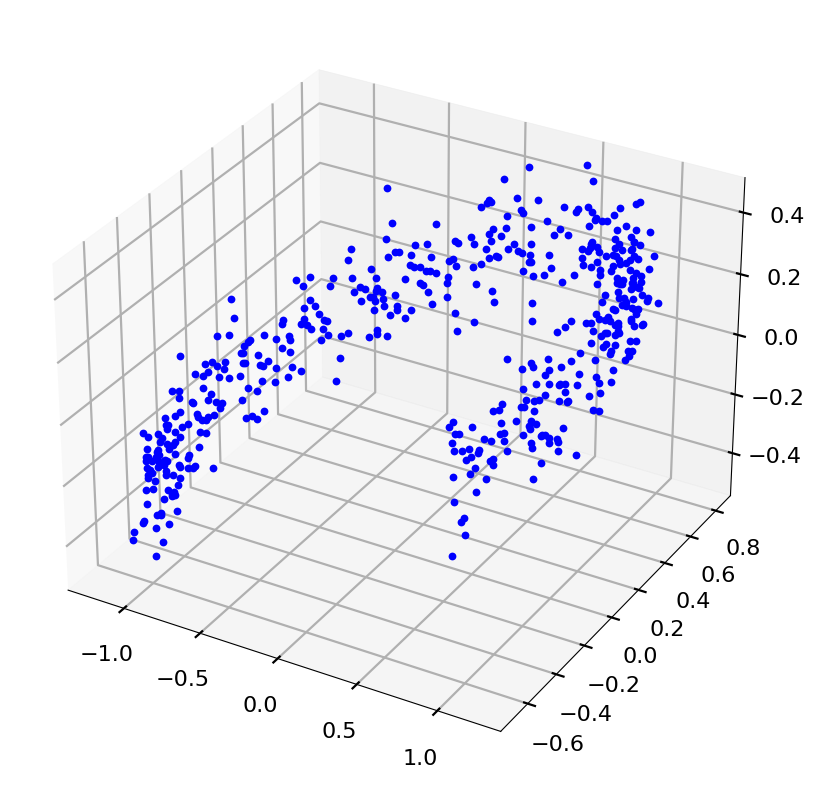

In [5]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

ax.plot3D(X[:, 0], X[:, 1], X[:, 2], 'b.')
plt.show()

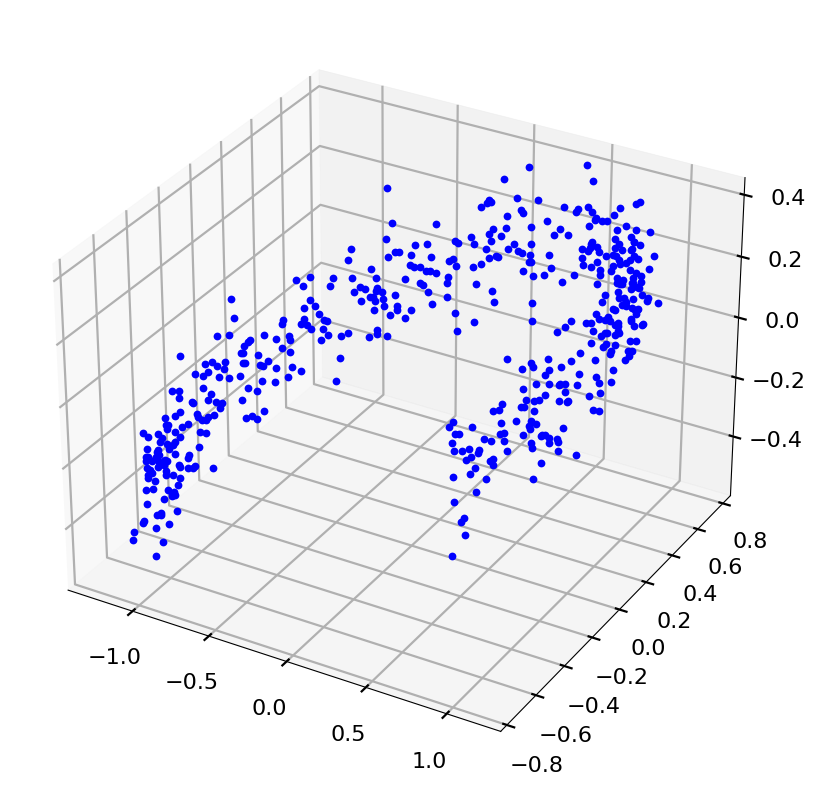

In [6]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

ax.plot3D(X_centre[:, 0], X_centre[:, 1], X_centre[:, 2], 'b.')
plt.show()

In [7]:
U, s, V = np.linalg.svd(X_centre)

In [8]:
print(U, s, V)

[[-0.04611075 -0.05444052 -0.031047   ... -0.04704719  0.05253462
   0.0484865 ]
 [ 0.05636614  0.03372019 -0.02644989 ... -0.046565   -0.04716949
  -0.05439186]
 [ 0.04171426 -0.04024596  0.02131526 ... -0.04724081 -0.02404934
  -0.01189396]
 ...
 [-0.04067128  0.05183433  0.05674894 ...  0.99108491 -0.00321208
  -0.00339066]
 [ 0.05798582  0.0371328   0.03488955 ... -0.00288032  0.99236941
  -0.00768311]
 [ 0.0541247   0.04418459  0.02407651 ... -0.00342453 -0.00811997
   0.99148362]] [2.01294826e+01 8.56026046e+00 2.27900328e+00 1.58506076e+00
 4.70972888e-16] [[-9.51135856e-01 -2.57294341e-01 -1.70693676e-01  1.39170073e-03
   1.39170073e-03]
 [ 2.92483892e-01 -9.24316275e-01 -2.35733482e-01  4.75516641e-02
   4.75516641e-02]
 [ 9.62916450e-02  2.26262875e-01 -8.82239890e-01 -2.83888893e-01
  -2.83888893e-01]
 [-2.28402016e-02 -1.68059979e-01  3.70062388e-01 -6.45866858e-01
  -6.45866858e-01]
 [ 0.00000000e+00  4.30736150e-17 -6.05360636e-17 -7.07106781e-01
   7.07106781e-01]]


In [9]:
c1 = V.T[:, 0]
c1

array([-0.95113586, -0.25729434, -0.17069368,  0.0013917 ,  0.0013917 ])

In [10]:
c2 = V.T[:, 1]

In [11]:
len(V.T)

5

In [12]:
m, n = X.shape

S = np.zeros(X_centre.shape)
print(S)
S[:n, :n] = np.diag(s)
print(S)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[20.1294826   0.          0.          0.          0.        ]
 [ 0.          8.56026046  0.          0.          0.        ]
 [ 0.          0.          2.27900328  0.          0.        ]
 ...
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


In [13]:
X_centre.shape

(500, 5)

In [14]:
s

array([2.01294826e+01, 8.56026046e+00, 2.27900328e+00, 1.58506076e+00,
       4.70972888e-16])

In [15]:
W2 = V.T[:, :2]
W2

array([[-0.95113586,  0.29248389],
       [-0.25729434, -0.92431628],
       [-0.17069368, -0.23573348],
       [ 0.0013917 ,  0.04755166],
       [ 0.0013917 ,  0.04755166]])

In [16]:
X2D = X_centre.dot(W2)
X2D[:10]

array([[-0.9281856 , -0.46602499],
       [ 1.13462118,  0.28865358],
       [ 0.83968639, -0.34451594],
       [ 0.25046356, -0.5955109 ],
       [-1.00305264,  0.11091453],
       [-1.04605645,  0.17207933],
       [-0.69470593,  0.31402599],
       [ 1.14383322,  0.00359279],
       [ 0.16830983, -0.59245017],
       [ 0.80162686, -0.42401984]])

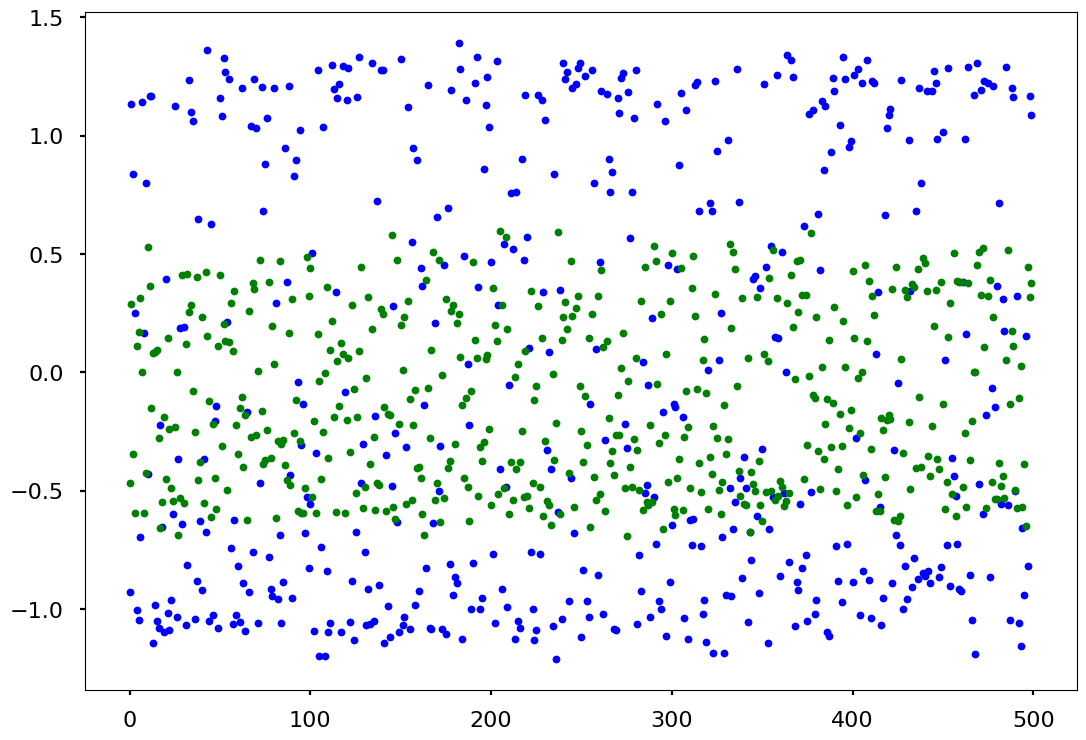

In [17]:
plt.plot(X2D[:,0], 'b.')
plt.plot(X2D[:,1], 'g.')
plt.show()

<h4>Using Scikit-Learn</h4>

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [20]:
X2D[:10]

array([[-0.90734782, -0.35091914],
       [ 1.1528724 ,  0.4121906 ],
       [ 0.86017616, -0.2199318 ],
       [ 0.27185244, -0.4717768 ],
       [-0.98412803,  0.22899464],
       [-1.02727574,  0.29276509],
       [-0.67655977,  0.43008152],
       [ 1.16313305,  0.12980171],
       [ 0.18966684, -0.46989488],
       [ 0.82237838, -0.30010188]])

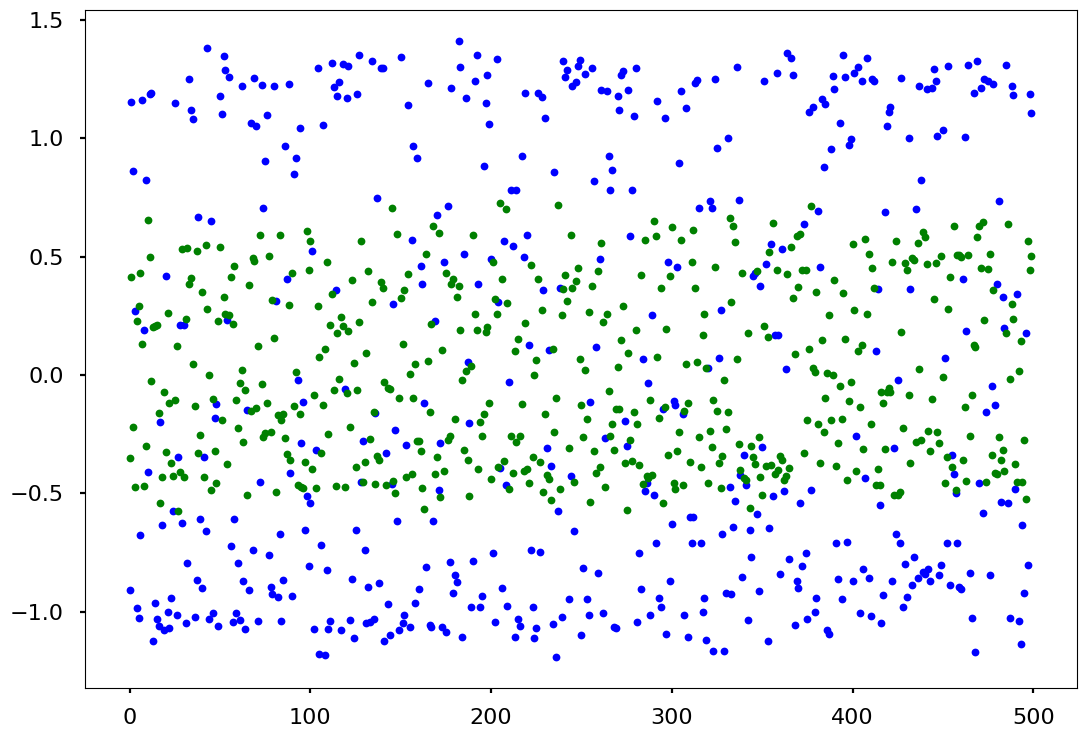

In [21]:
plt.plot(X2D[:,0].T, 'b.')
plt.plot(X2D[:,1], 'g.')
plt.show()

In [22]:
pca.components_.T[:, 0]

array([-9.52070357e-001, -2.53984041e-001, -1.70452757e-001,
       -1.77626522e-315, -6.26065949e-315])

In [23]:
print(pca.explained_variance_ratio_)

[0.85155741 0.1391363 ]


<body>
    This explains, 63.5% lies in the 1st PCA, <br>
    23.4 % lies on the 2nd PCA, <br>
    and the rest 13.1% lies in the latter.
</body>

In [24]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.85155741, 0.99069371, 1.        , 1.        , 1.        ])

In [25]:
d = np.argmax(cumsum >=0.95) + 1
d

2

In [26]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [27]:
X_reduced

array([[-9.07347815e-01, -3.50919142e-01],
       [ 1.15287240e+00,  4.12190600e-01],
       [ 8.60176163e-01, -2.19931797e-01],
       [ 2.71852441e-01, -4.71776798e-01],
       [-9.84128030e-01,  2.28994638e-01],
       [-1.02727574e+00,  2.92765086e-01],
       [-6.76559774e-01,  4.30081515e-01],
       [ 1.16313305e+00,  1.29801709e-01],
       [ 1.89666840e-01, -4.69894884e-01],
       [ 8.22378383e-01, -3.00101878e-01],
       [-4.11328188e-01,  6.54207663e-01],
       [ 1.18592618e+00,  4.96872866e-01],
       [ 1.18930720e+00, -2.45779565e-02],
       [-1.12376503e+00,  2.03144217e-01],
       [-9.64622716e-01,  2.06243640e-01],
       [-1.03052336e+00,  2.11723357e-01],
       [-1.06074472e+00, -1.61752901e-01],
       [-1.99443086e-01, -5.39725813e-01],
       [-6.32165305e-01, -4.30517204e-01],
       [-1.07798211e+00, -6.96406188e-02],
       [ 4.18021460e-01, -3.24675465e-01],
       [-9.98786660e-01,  2.62937143e-01],
       [-1.06889297e+00, -1.19959492e-01],
       [-9.

<h3>PCA for Compression</h3>

In [28]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [29]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [30]:
X_mnist = mnist["data"]
y_mnist = mnist["target"]

In [31]:
pca = PCA(n_components=154)
X_mnist_reduced = pca.fit_transform(X_mnist)

In [32]:
X_mnist[:,154]

array([48.,  0., 53., ...,  0.,  0.,  0.])

In [33]:
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)

In [34]:
X_mnist_recovered.transpose()[0]

array([2.35822233e-13, 2.13056118e-13, 5.28454786e-13, ...,
       8.97326336e-14, 8.24261357e-14, 6.59152965e-14])

In [35]:
len(X_mnist_recovered.transpose()[0])

70000

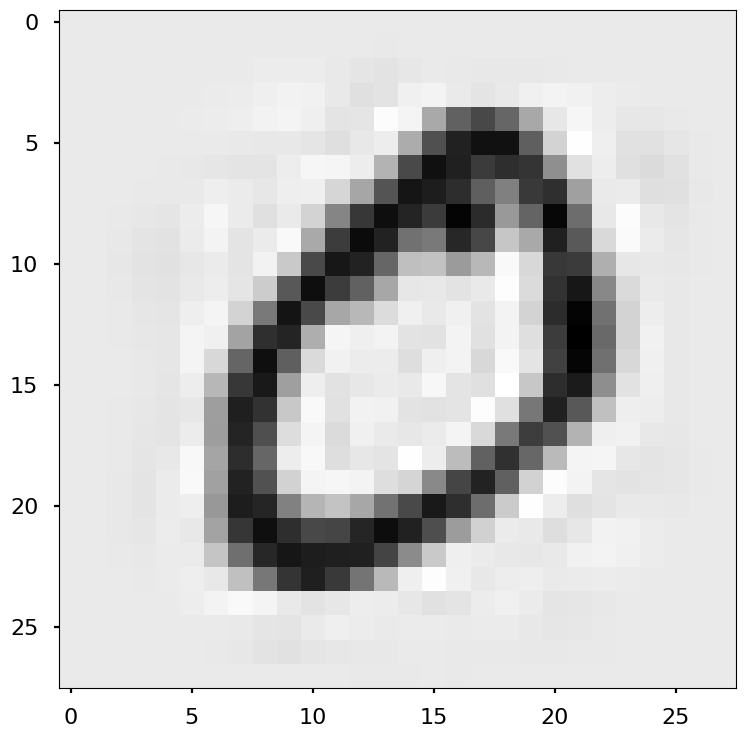

In [36]:
plt.imshow(X_mnist_recovered[0].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.show()

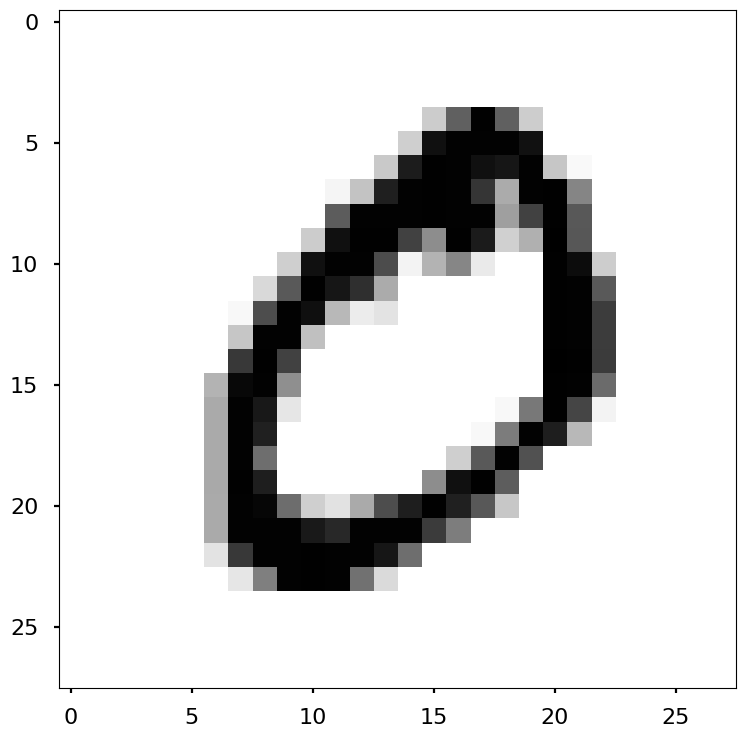

In [37]:
plt.imshow(X_mnist[0].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.show()

In [38]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
    inc_pca.partial_fit(X_batch)

In [39]:
X_mnist_reduced = inc_pca.transform(X_mnist)

In [42]:
(X_mnist_reduced)

array([[1010.4938683 ,  289.98656863, -576.13114671, ...,  -21.53246354,
           7.97250479,   66.49000303],
       [1033.56107939,  351.21945458, -498.41164119, ...,   42.61636151,
          -4.26624125,  -32.03748646],
       [ 615.42549819,  244.23720443, -629.1356727 , ...,  -25.53719085,
          67.39369222,   12.92413852],
       ...,
       [-134.28449353, -759.42323427, -308.88648232, ...,  -13.00851139,
         -89.26747764,  -24.07804102],
       [  13.23663654, -870.39542857, -579.51620865, ...,   -2.30283932,
         -25.74800004,   52.1762533 ],
       [ 341.06600294, -959.30471249, -355.65429049, ...,  -40.44979244,
         -65.81777832,  -28.31107386]])

In [58]:
filename = "mymnist.data"
m, n = X_mnist.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_mnist

In [59]:
batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=700, n_components=154)

In [61]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_mnist)

In [62]:
X_reduced

array([[1010.49400346, -289.96362065,  576.12074519, ...,  -28.09139401,
         -60.1711231 ,   16.02749543],
       [1033.56076576, -351.18369261,  498.39574124, ...,   29.45685931,
           2.53949054,   17.82994941],
       [ 615.42657896, -244.22029642,  629.11004215, ...,  -18.90701889,
          17.3970045 ,   17.59211491],
       ...,
       [-134.30268579,  759.46127816,  308.909969  , ...,    3.54087241,
          39.57565105,  -17.81703957],
       [  13.21551486,  870.40594451,  579.58028992, ...,   33.4626796 ,
          77.82831442,   45.45838106],
       [ 341.04917458,  959.32076967,  355.68064138, ...,   23.46480628,
          54.86498734,   -8.78052678]])

In [68]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)

In [69]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [70]:
from sklearn.metrics import mean_squared_error

In [73]:
mean_squared_error(X, X_preimage)

0.025665765615415066